### Using BlackBoxOptim

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/forwardDiff/one_state_model/model/importData.jl:30


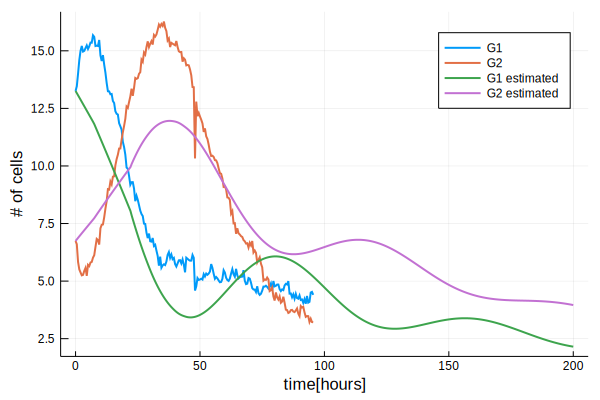

In [2]:
include("DDEmodel.jl")
include("importData.jl")

# Import the data
pop, g2, g1, g2_0, g1_0 = get_data(joinpath("..", "data", "gem.csv"),
                                   joinpath("..", "data", "gem_pop.csv"))


# initial guess
initial_guess = log.([0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001])

# trial number
j = 8

# data
data = vcat(g1[:, j]', g2[:, j]');

# do the optimization, return the estimated parameters and the objective function
min_p, _ = optimization(g1, g2, g1_0, g2_0, initial_guess, j)

# plot the long-term estimation and the original data
PlotIt(g1_0, g2_0, j, min_p, data)